In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

tqdm.pandas()

%matplotlib inline

NUM_FEATURES = 5000
NUM_CLASSES = 3993

In [2]:
features = pd.read_csv("../data/expanded/train_features.csv", names=range(NUM_FEATURES))
labels = pd.read_csv("../data/expanded/train_labels.csv", names=range(NUM_CLASSES))

In [3]:
features

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.118379,0.138594,0.424367,0.261019,0.350030,0.106491,0.137765,0.145839,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.152201,0.415781,0.000000,0.261019,1.137597,0.319472,0.137765,0.291678,10.204442,0.309297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050734,1.351288,0.848735,0.130509,0.262522,1.277887,0.275531,0.875034,3.503017,0.927891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050734,0.346484,0.235760,0.130509,0.087507,0.532453,0.275531,0.291678,0.609220,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.033823,0.589023,0.235760,0.261019,0.437537,0.958415,0.688827,1.312552,2.132271,1.391837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13954,0.033823,0.277187,0.895887,0.195764,0.175015,0.745434,0.137765,0.291678,1.218441,0.618594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13955,0.050734,0.207890,0.094304,0.130509,0.350030,0.851925,0.137765,0.291678,0.304610,1.082540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13956,0.033823,0.000000,0.330063,0.065255,0.175015,0.319472,0.000000,0.145839,0.000000,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13957,0.033823,0.242539,0.094304,0.130509,0.175015,0.638943,0.137765,0.291678,0.761526,0.309297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
labels

,0,1,2,3,4,5,6,7,8,9,...,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
features.describe()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,...,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000,13959.000000
mean,0.121740,0.698821,0.526907,0.216151,0.483946,1.275636,0.220154,0.563129,1.591473,0.772102,...,0.062121,0.053472,0.047967,0.066839,0.027522,0.060156,0.039317,0.285444,0.048878,0.027592
std,0.558771,1.720856,1.498035,0.237373,2.025511,4.019590,0.518645,1.252672,4.279575,3.713431,...,1.461809,2.358984,1.317974,1.690282,0.632955,1.727780,0.753770,19.421615,1.110835,0.565910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050734,0.173242,0.141456,0.130509,0.175015,0.319472,0.137765,0.145839,0.304610,0.309297,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.067645,0.311836,0.235760,0.130509,0.262522,0.638943,0.137765,0.291678,0.609220,0.463946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.118379,0.692968,0.518671,0.261019,0.525045,1.064906,0.275531,0.583356,1.370746,0.927891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.307835,87.383263,115.192162,4.828849,211.768082,228.848251,42.707283,70.440269,217.339386,404.869812,...,82.324593,263.438690,120.742737,109.766121,54.883060,164.649185,32.929836,2195.322510,66.027512,33.013756


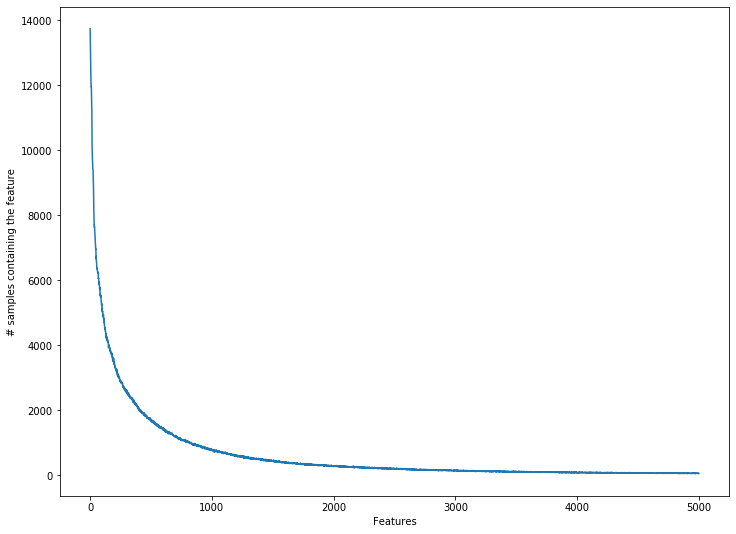

In [6]:
(features != 0).sum(axis=0).plot(figsize=(12, 9))
plt.xlabel("Features")
plt.ylabel("# samples containing the feature")
plt.show()

In [7]:
examples_per_label = labels.sum(axis=0)
examples_per_label.describe()

count    3993.000000
mean       18.605810
std        49.398531
min         0.000000
25%         1.000000
50%         4.000000
75%        14.000000
max       924.000000
dtype: float64

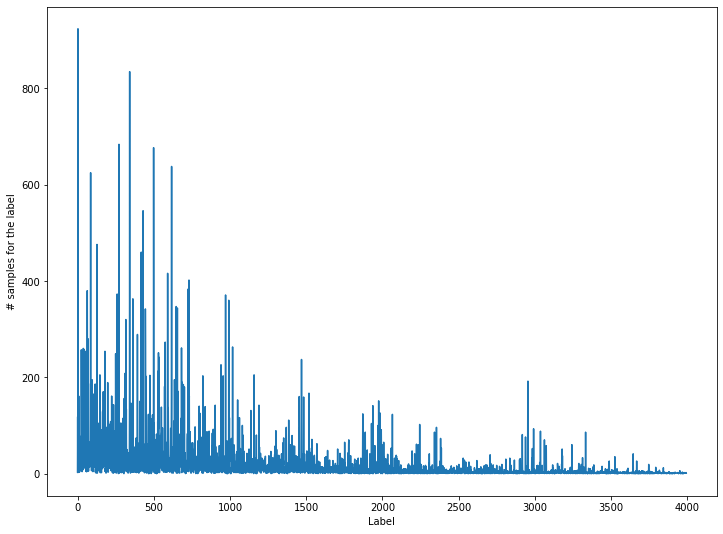

In [8]:
examples_per_label.plot(figsize=(12, 9))
plt.xlabel("Label")
plt.ylabel("# samples for the label")
plt.show()

In [9]:
print(f"{examples_per_label[examples_per_label == 0].shape[0]} labels with no examples")

282 labels with no examples


In [10]:
# Count of examples in the given range. For example, the second line can be
# interpreted as - there are 1199 examples having 2, 3, 4, or 5 labels each
pd.cut(
    examples_per_label,
    bins=[0, 1, 5, 25, 125, 250, 500, 1010],
    include_lowest=True
).value_counts(sort=False)

(-0.001, 1.0]      1027
(1.0, 5.0]         1199
(5.0, 25.0]        1119
(25.0, 125.0]       536
(125.0, 250.0]       77
(250.0, 500.0]       28
(500.0, 1010.0]       7
dtype: int64

In [11]:
labels_per_example = labels.sum(axis=1)
labels_per_example.describe()

count    13959.000000
mean         5.322229
std          1.359523
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         24.000000
dtype: float64